## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#The GTD defines terrorism as:

“The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation.”

In [ ]:
# Here are few helpful packages to load in.

import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
from matplotlib import animation,rc
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

#Reading the Data

##First, I read the CSV file and check the first five rows:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Global Terrorism Data.csv'
df=pd.read_csv(file_path,encoding ='latin-1')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


As you see above, there are 135 columns in this dataset. Some of them have too many Null values and also many of them don't suit my purpose in this analysis. So, during renaming the column names (to have a cleaner vision), I just don't specify them as a column. Also, I create a new column called **Casualties** which is made out of the summation of 'Killed' and 'Wounded':


In [ ]:
#Make a copy of our original dataset to protect it from any permanent changes.
df_terr = df.copy()

##Dropping unwanted features.

In [ ]:
# Here we filter the required columns.
df_terr.rename(columns={'iyear':'Year','imonth':'Month','provstate':'Province','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','success':'Success','natlty1_txt':'Nationality','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df_terr['Casualties'] = df_terr.Killed + df_terr.Wounded
df_terr=df_terr[['Year','Month','Day','Country','Province','location','Region','City','Success','Nationality','AttackType','Killed','Wounded','Casualties','Target','Group','Target_type','Weapon_type']]


#Understanding the data

In [ ]:
#To see all columns in one screen.
pd.set_option('display.max_columns',None)

In [ ]:
#Checking the first five rows.
df_terr.head()

,Year,Month,Day,Country,Province,location,Region,City,Success,Nationality,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,NaN,Central America & Caribbean,Santo Domingo,1,Dominican Republic,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,NaN,North America,Mexico city,1,Belgium,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,NaN,Southeast Asia,Unknown,1,United States,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,NaN,Western Europe,Athens,1,United States,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,NaN,East Asia,Fukouka,1,United States,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [ ]:
df_terr.shape

(181691, 18)

In [ ]:
#Checking the number of unique values in columns.
n = df_terr.nunique(axis=0)

print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 Year              47
Month             13
Day               32
Country          205
Province        2855
location       44109
Region            12
City           36674
Success            2
Nationality      215
AttackType         9
Killed           205
Wounded          238
Casualties       341
Target         86006
Group           3537
Target_type       22
Weapon_type       12
dtype: int64


In [ ]:
df_terr['Success'].unique()

array([1, 0])

##Checking for missing values:

In [ ]:
#Checking the Null-Values in individual columns.
df_terr.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Province          421
location       126196
Region              0
City              434
Success             0
Nationality      1559
AttackType          0
Killed          10313
Wounded         16311
Casualties      16874
Target            636
Group               0
Target_type         0
Weapon_type         0
dtype: int64

Let us see the above values in normalize form. As you see, only four columns have a noticeable number of NaNs (less than 10 percents). But they are really important to our exploratory analysis.

In [ ]:
#Null-Values in percentage form.
(df_terr.isnull().sum()/df_terr.shape[0])*100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Province        0.231712
location       69.456385
Region          0.000000
City            0.238867
Success         0.000000
Nationality     0.858050
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Casualties      9.287196
Target          0.350045
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
dtype: float64

*By seeing above analysis, we can see that 'Location' would be a problematic feature in our analysis because of high null values.*

In [ ]:
df_terr. drop('location', axis=1, inplace=True)

##Typecasting the data

In [ ]:
#Observing the nature of columns.
df_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Province     181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Success      181691 non-null  int64  
 8   Nationality  180132 non-null  object 
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Casualties   164817 non-null  float64
 13  Target       181055 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 23.6+ MB


##Changing the datatype.

In [ ]:
#Running a loop for changing the data type of columns.
for col in df_terr.select_dtypes(include = 'object').columns:
    df_terr[col] = df_terr[col].astype('category')

In [ ]:
df_terr['Success'] = df_terr['Success'].astype('category')

In [ ]:
df_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Year         181691 non-null  int64   
 1   Month        181691 non-null  int64   
 2   Day          181691 non-null  int64   
 3   Country      181691 non-null  category
 4   Province     181270 non-null  category
 5   Region       181691 non-null  category
 6   City         181257 non-null  category
 7   Success      181691 non-null  category
 8   Nationality  180132 non-null  category
 9   AttackType   181691 non-null  category
 10  Killed       171378 non-null  float64 
 11  Wounded      165380 non-null  float64 
 12  Casualties   164817 non-null  float64 
 13  Target       181055 non-null  category
 14  Group        181691 non-null  category
 15  Target_type  181691 non-null  category
 16  Weapon_type  181691 non-null  category
dtypes: category(11), float64(3), int64(3)
memory usa

##Let's begin with checking the correlation between different features, this will give us a roadmap on how to proceed further.

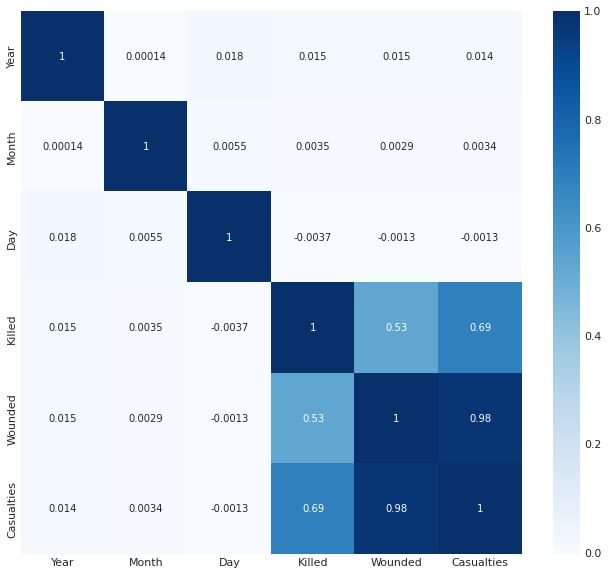

In [ ]:
#This plot helps us to observe correlation among all features.
plt.figure(figsize=(10,10))
sns.heatmap(df_terr.corr(),cbar=True,annot=True,cmap='Blues');

#**Univariate Analysis**

In [ ]:
#Here we assign numerical features.
numerical_features = df_terr.select_dtypes(include=['int64','float64'])
numerical_features.columns

Index(['Year', 'Month', 'Day', 'Killed', 'Wounded', 'Casualties'], dtype='object')

In [ ]:
#Here we assign categorical features.
categorical_feature = df_terr.select_dtypes(include=['category'])
categorical_feature.columns

Index(['Country', 'Province', 'Region', 'City', 'Success', 'Nationality',
       'AttackType', 'Target', 'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

##Numerical Analysis

In [ ]:
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

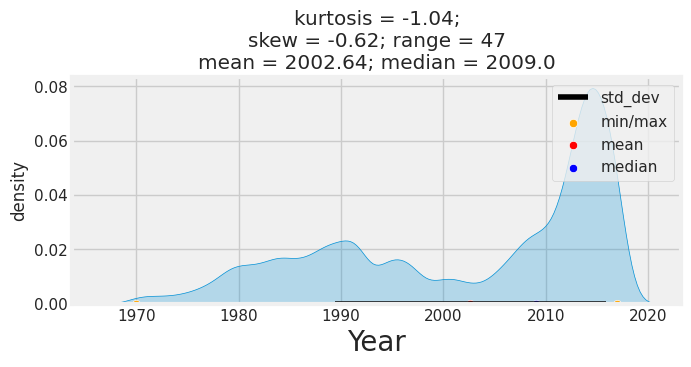

In [ ]:
#Analyzing "Year" feature.
UVA_KDE(df_terr,['Year'])

From the above graph, you can say that the graph deviates from the normal and is negatively skewed. Now, find the Skewness and Kurtosis of the graph.  

*Here, for univariate analysis, we can have a year feature as **independent variable** to analyze because all other features of this dataset are highly divergent and are indirectly dependent on it.*


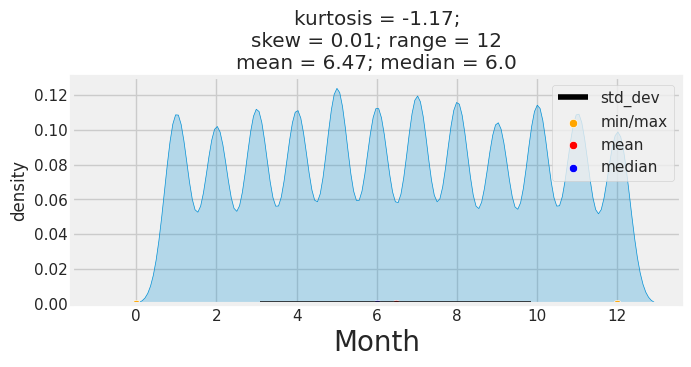

In [ ]:
#Analyzing "Month" feature.
UVA_KDE(df_terr,[ 'Month'])

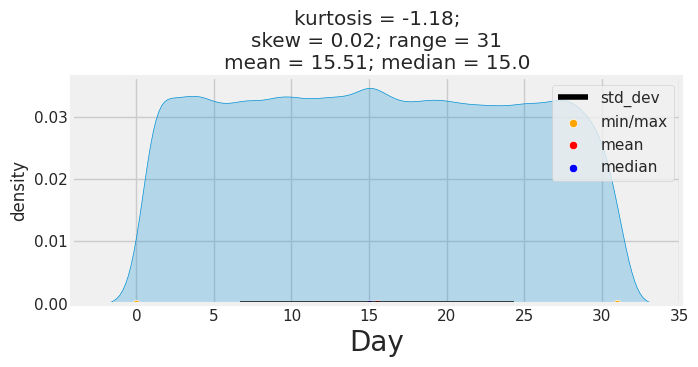

In [ ]:
#Analyzing "Day" feature.
UVA_KDE(df_terr,[ 'Day'])

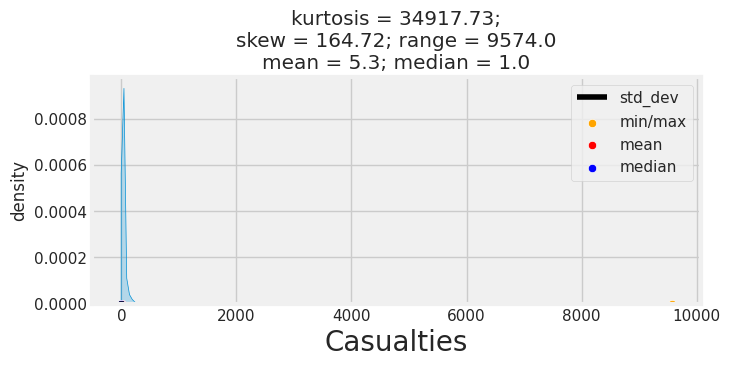

In [ ]:
#Analyzing "Casualties" feature.
UVA_KDE(df_terr,[ 'Casualties'])


*   We analyses our data a range of 47 years, minimum number of casualties are 0 and the maximum number of casualties are 9574.



*   The mean year of attacks is calculated as 2002 and the median year of attacks is seen 2009.


*  The mean Avg casualties are approximately 5.3 and median Avg casualties are approximately 1 person.


In [ ]:
#We define a function to check the outliers in the dataset.
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):

    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])

    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)),
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

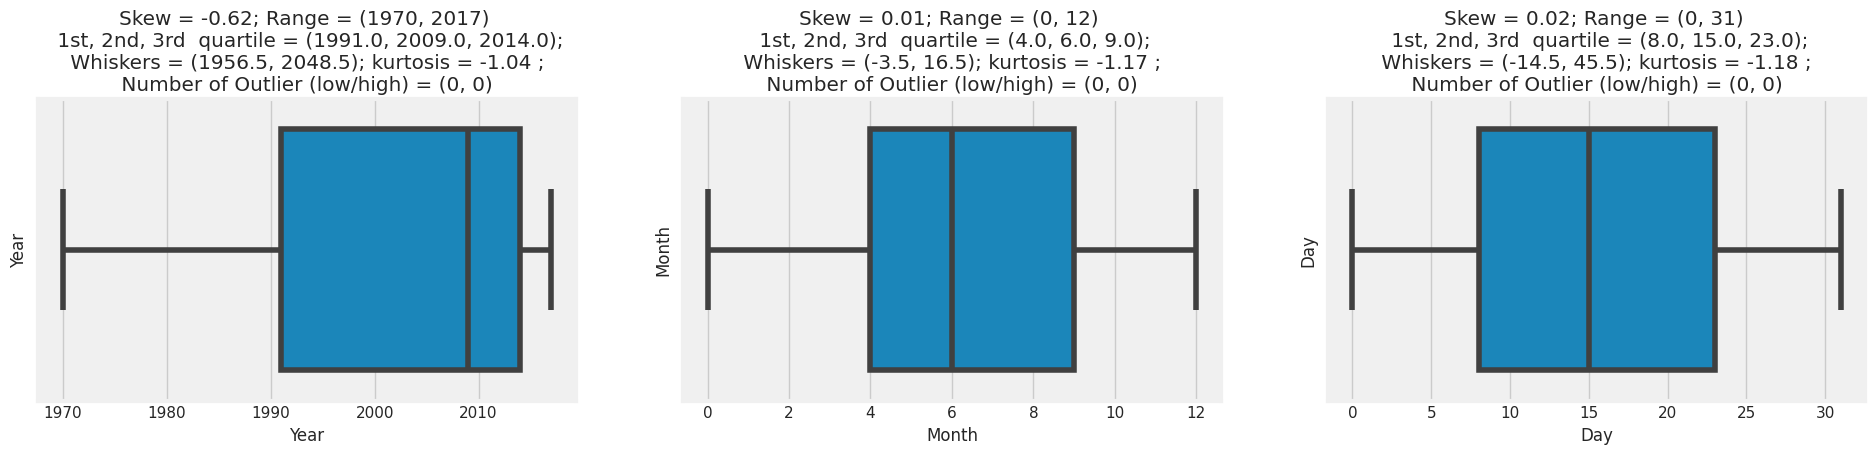

In [ ]:
#Checking the outliers with numerical features.
UVA_boxplot(df_terr,['Year', 'Month', 'Day'])

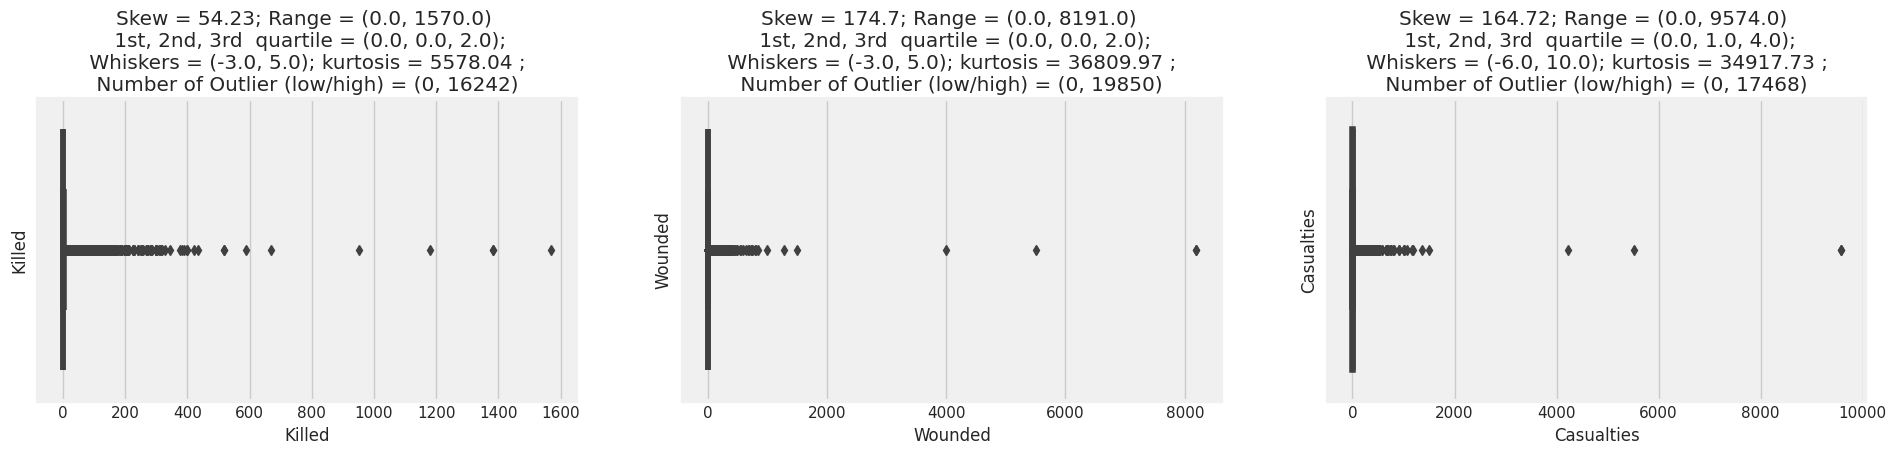

In [ ]:
#Checking the outlies with some categorical features.
UVA_boxplot(df_terr,['Killed', 'Wounded', 'Casualties'])

Hence, we can see that the range of data is large and its difficult to figure out the outliers in these features.
The number of low outliers shows 0 whereas high shows very large number.

##Let's see the maximum number of attacks on the basis of year:

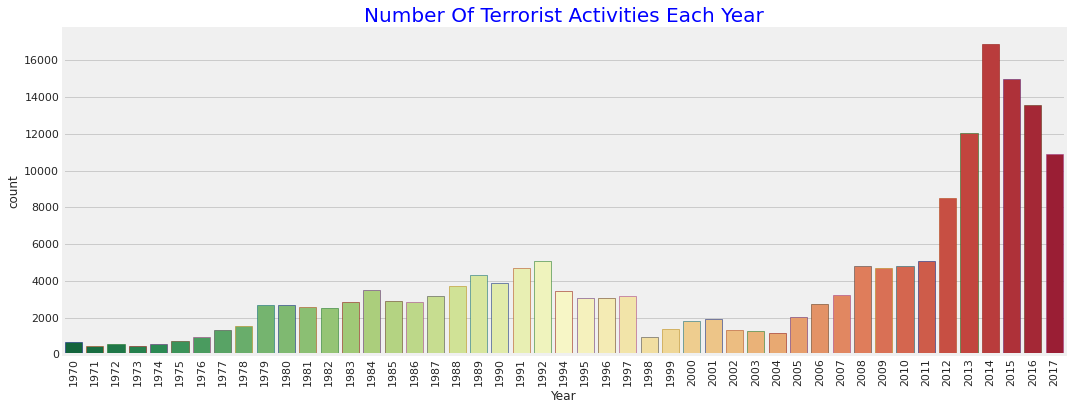

In [ ]:
plt.subplots(figsize=(16,6))
sns.countplot('Year',data=df_terr,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year', fontsize=20, color = 'blue')
plt.show()

As you see, overall, there has been a rise in the number of terrorist attacks after 2005. And the peak was **2014** which is based on our knowledge is connected with the ISIL terrorist group, grabbing the power in Iraq and Syria. Therefore, the number of attacks is dependent on a particular year.

##Categorical Analysis

In [ ]:
#Analyzing some of the categorical features.
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)

  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

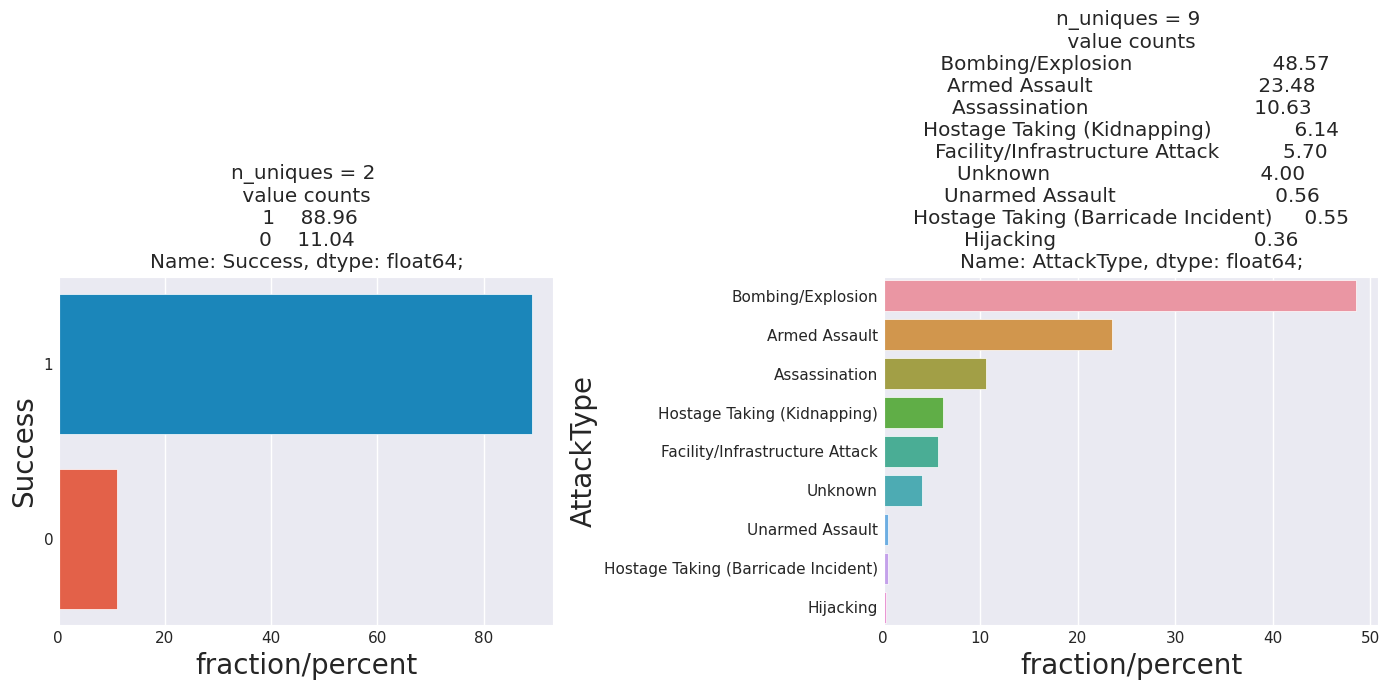

In [ ]:
#Success and AttackType to be analyzed seperately for better visualization.
UVA_category(df_terr, ['Success', 'AttackType'])

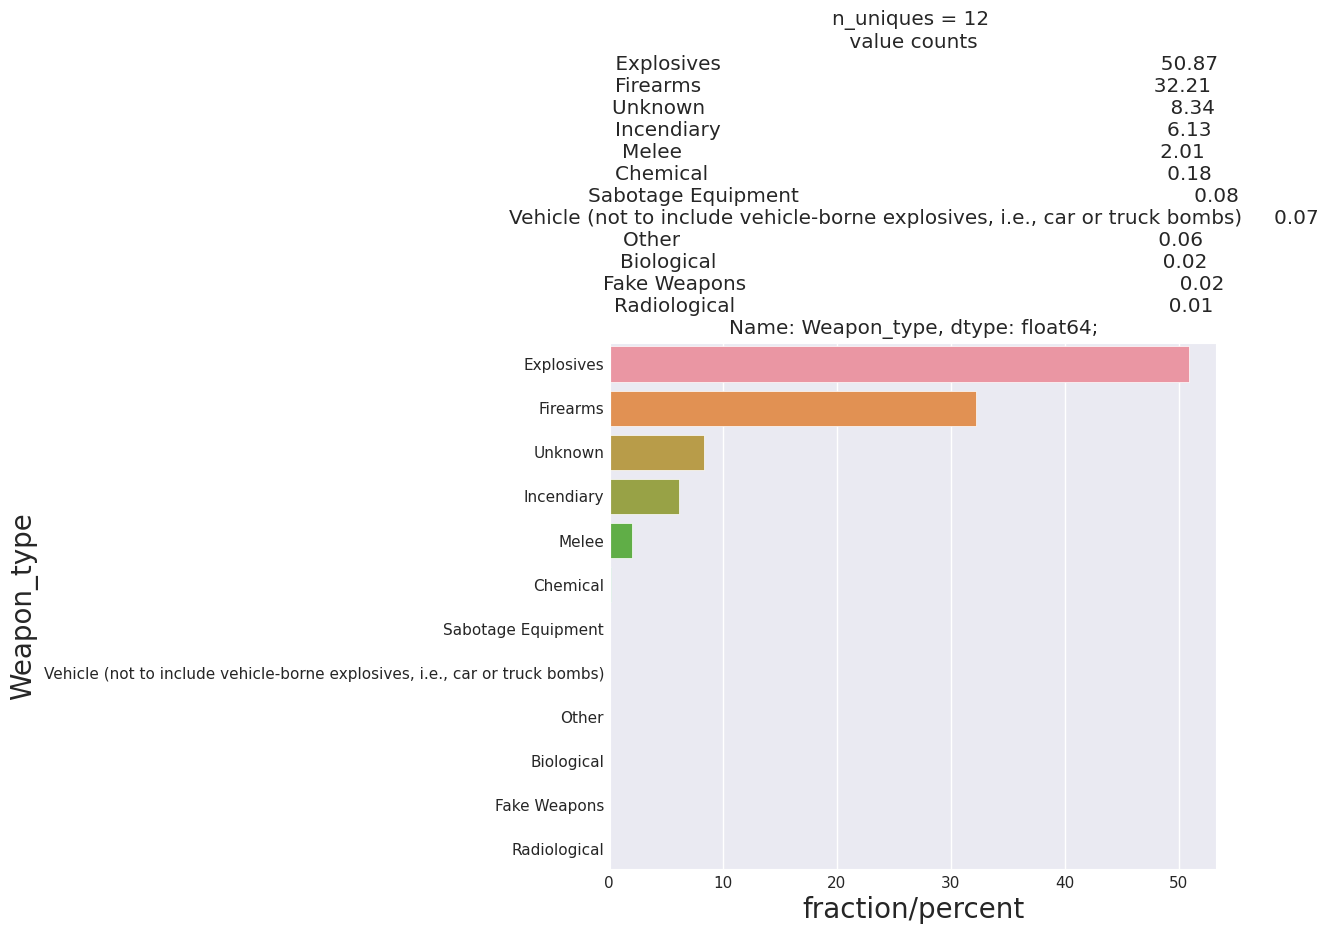

In [ ]:
#Analysis done on the basis of Weapon_type.
UVA_category(df_terr, ['Weapon_type'])



*   There is approx. 89% of successful attempts achieved by the terrorists as per above analysis.
*   In total number of attacks, 50% of times specifically Explosives are used which is highest in its category.


##Due to high variation in some categorical features, Let's do the analysis in normalize form:

In [ ]:
#Normalizing the count of attack on the basis of Target_type.
(df_terr['Target_type'].value_counts(normalize = True)*100)

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Government (Diplomatic)            1.966526
Terrorists/Non-State Militia       1.672620
Journalists & Media                1.622535
Violent Political Party            1.027018
Airports & Aircraft                0.739167
Telecommunication                  0.555338
NGO                                0.533873
Tourists                           0.242169
Maritime                           0.193185
Food or Water Supply               0.174472
Abortion Related                   0.144751
Other                              0.075403
Name: Target_type, dtype: float6

##Observing the highest affected country.

Figure(1152x792) AxesSubplot(0.08,0.125;0.87x0.755)


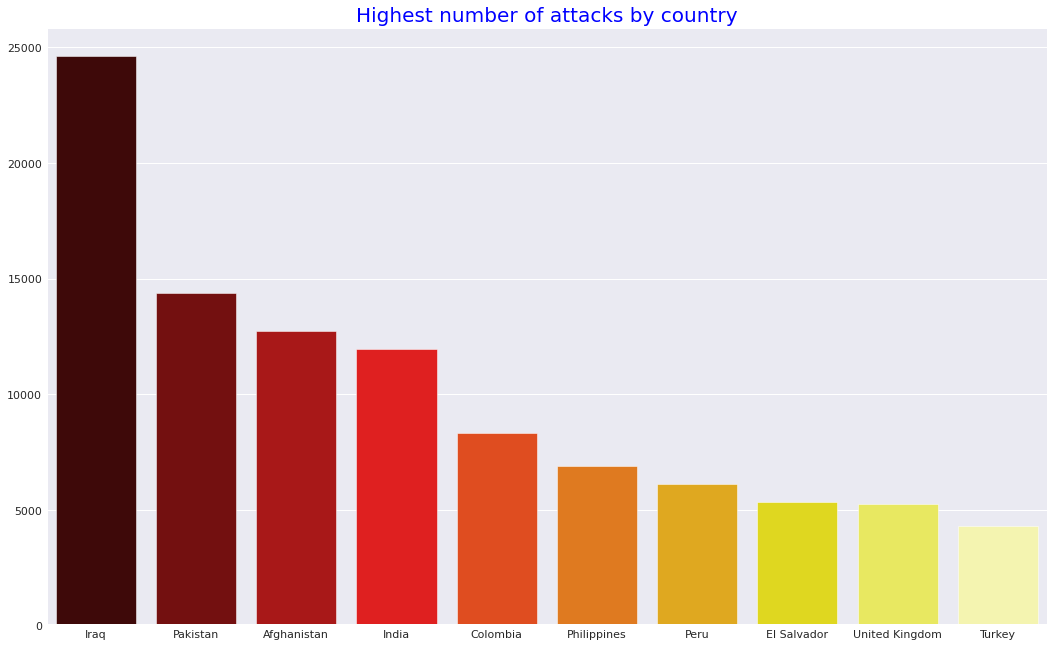

In [ ]:
#Visualizing the highest number of attacks by a country.
#df['city'].value_counts().drop('Unknown')[:20].values
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=1)
print(fig,axes)
sns.barplot(x = df['country_txt'].value_counts()[:10].index, y = df['country_txt'].value_counts()[:10].values, palette = 'hot');
plt.title('Highest number of attacks by country', fontsize=20, color = 'blue');

In [ ]:
#Normalizing the count of attack on the basis of Country.
(df_terr['Country'].value_counts(normalize = True)*100)[:20]

Iraq              13.559285
Pakistan           7.907932
Afghanistan        7.006951
India              6.582605
Colombia           4.571498
Philippines        3.802060
Peru               3.355147
El Salvador        2.928048
United Kingdom     2.881265
Turkey             2.362252
Somalia            2.279695
Nigeria            2.150354
Thailand           2.118432
Yemen              1.842139
Spain              1.788201
Sri Lanka          1.663263
United States      1.560892
Algeria            1.509706
France             1.482187
Egypt              1.364404
Name: Country, dtype: float64

In [ ]:
#Using the print function to analyze the detailed response.
print(f"The highest terrorist attacks were commited in \033[1m{df_terr.Country.value_counts().index[0]}\033[0m with {df_terr.Country.value_counts().max()} attacks")

print('\nThe other 4 countries with highest top ordered terrorist attacks are:')
for i in range(1,5):
    print(f"\n{i+1}. \033[1m{df_terr.Country.value_counts().index[i]}\033[0m with {df_terr.Country.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Iraq with 24636 attacks

The other 4 countries with highest top ordered terrorist attacks are:

2. Pakistan with 14368 attacks

3. Afghanistan with 12731 attacks

4. India with 11960 attacks

5. Colombia with 8306 attacks


In [ ]:
#Normalizing the count of attack on the basis of Province.
(df_terr['Province'].value_counts(normalize = True)*100)[:20]

Baghdad                                4.217466
Northern Ireland                       2.481381
Unknown                                2.366635
Balochistan                            2.046671
Saladin                                1.881723
Al Anbar                               1.819937
Nineveh                                1.787941
Sindh                                  1.768632
Khyber Pakhtunkhwa                     1.701330
Diyala                                 1.677608
Lima                                   1.442599
Jammu and Kashmir                      1.353782
Federally Administered Tribal Areas    1.319579
San Salvador                           1.060848
Antioquia                              1.043195
Punjab                                 0.980857
Kirkuk                                 0.920726
Santiago Metropolitan                  0.904176
Banaadir                               0.889833
West Bank                              0.873835
Name: Province, dtype: float64

In [ ]:
#Normalizing the count of attack on the basis of Region.
(df_terr['Region'].value_counts(normalize = True)*100)[:20]

Middle East & North Africa     27.780132
South Asia                     24.753015
South America                  10.445206
Sub-Saharan Africa              9.659257
Western Europe                  9.157856
Southeast Asia                  6.871557
Central America & Caribbean     5.693182
Eastern Europe                  2.831180
North America                   1.902131
East Asia                       0.441409
Central Asia                    0.309867
Australasia & Oceania           0.155209
Name: Region, dtype: float64

##Visualizing the region where most of the attacks were carried out.

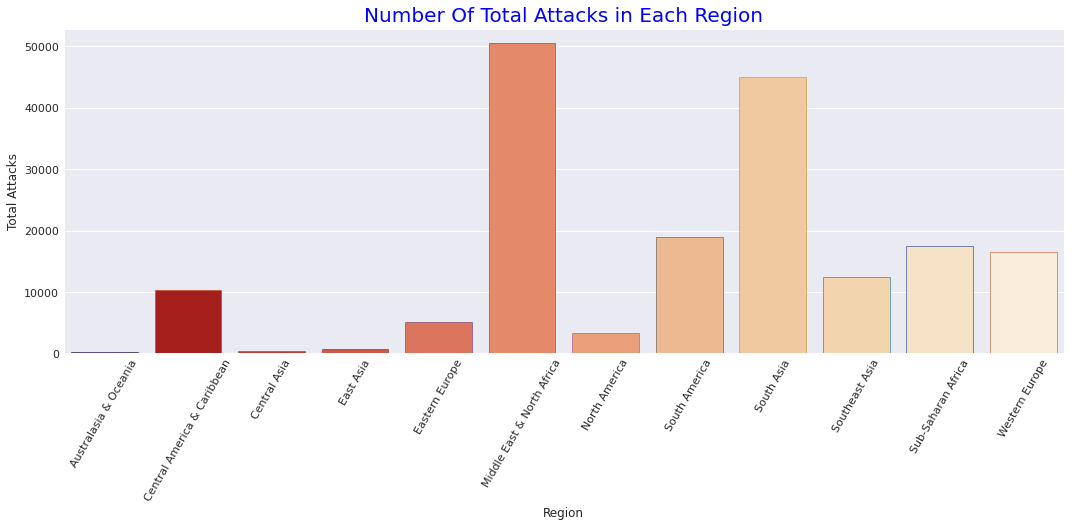

In [ ]:
#Visualizing the highest number of attacks by a Region.
region_attacks = df_terr.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(16,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=60)
plt.title('Number Of Total Attacks in Each Region', fontsize=20, color = 'blue')
plt.show()

In [ ]:
#Using the print function to analyze the detailed response.
print(f"The region that highest terrorist attacks were commited in \033[1m{df_terr.Region.value_counts().index[0]}\033[0m with {df_terr.Region.value_counts().max()} attacks")

print('\nThe other regions orderd by highest terrorist attacks are:')
for i in range(1,7):
    print(f"\n{i+1}. \033[1m{df_terr.Region.value_counts().index[i]}\033[0m with {df_terr.Region.value_counts()[i]} attacks")

The region that highest terrorist attacks were commited in Middle East & North Africa with 50474 attacks

The other regions orderd by highest terrorist attacks are:

2. South Asia with 44974 attacks

3. South America with 18978 attacks

4. Sub-Saharan Africa with 17550 attacks

5. Western Europe with 16639 attacks

6. Southeast Asia with 12485 attacks

7. Central America & Caribbean with 10344 attacks


As we could expect, a large proportion of the Attacks were occurred in **Middle east and North Africa** as well as **South Asia** as the summation of these two is roughly equal to the summation of all the other regions.

In [ ]:
#Normalizing the count of attack on the basis of Target.
(df_terr['Target'].value_counts(normalize = True)*100)[:20]

Civilians         3.568529
Unknown           3.268620
Soldiers          1.743669
Patrol            1.624921
Checkpoint        1.604485
Vehicle           1.538207
Officers          0.986993
Village           0.927343
Military Unit     0.846704
Bus               0.737345
Convoy            0.697026
Unit              0.660020
Market            0.659468
Police Station    0.657259
Base              0.488802
Office            0.483279
House             0.455110
Checkpost         0.435227
Post              0.408163
Mosque            0.383309
Name: Target, dtype: float64



*   Almost 3.5% of total attacks are targeted on Civilians.



In [ ]:
#Normalizing the count of attack on the basis of Group.
(df_terr['Group'].value_counts(normalize = True)*100)[:20]

Unknown                                             45.561971
Taliban                                              4.115779
Islamic State of Iraq and the Levant (ISIL)          3.089311
Shining Path (SL)                                    2.507004
Farabundo Marti National Liberation Front (FMLN)     1.844340
Al-Shabaab                                           1.809666
New People's Army (NPA)                              1.525667
Irish Republican Army (IRA)                          1.470078
Revolutionary Armed Forces of Colombia (FARC)        1.368807
Boko Haram                                           1.330831
Kurdistan Workers' Party (PKK)                       1.271389
Basque Fatherland and Freedom (ETA)                  1.113979
Communist Party of India - Maoist (CPI-Maoist)       1.033623
Maoists                                              0.897128
Liberation Tigers of Tamil Eelam (LTTE)              0.883918
National Liberation Army of Colombia (ELN)           0.859151
Tehrik-i

In [ ]:
#Using the print function to analyze the detailed response.
print(f"The Terrorist group that has highest terrorist attacks were committed \nby \033[1m{df_terr.Group.value_counts().index[0]}\033[0m with {df_terr.Group.value_counts().max()} attacks")

print('\nThe other groups orderd by highest terrorist attacks are:')
for i in range(1,7):
    print(f"\n{i+1}. \033[1m{df_terr.Group.value_counts().index[i]}\033[0m with {df_terr.Group.value_counts()[i]} attacks")

The Terrorist group that has highest terrorist attacks were committed 
by Unknown with 82782 attacks

The other groups orderd by highest terrorist attacks are:

2. Taliban with 7478 attacks

3. Islamic State of Iraq and the Levant (ISIL) with 5613 attacks

4. Shining Path (SL) with 4555 attacks

5. Farabundo Marti National Liberation Front (FMLN) with 3351 attacks

6. Al-Shabaab with 3288 attacks

7. New People's Army (NPA) with 2772 attacks


#**Bivariate Analysis**


In [ ]:
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm

##Bavariate Analysis between Categorical and Categorical variables:

In [ ]:
#We define a function to implement Bivariate Analysis.
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  #plt.data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))
  plt.xticks(rotation=90)
  #annotate_horizontal(splot)
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [ ]:
categorical_feature.columns

Index(['Country', 'Province', 'Region', 'City', 'Success', 'Nationality',
       'AttackType', 'Target', 'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

##How much the success rate of attacks:

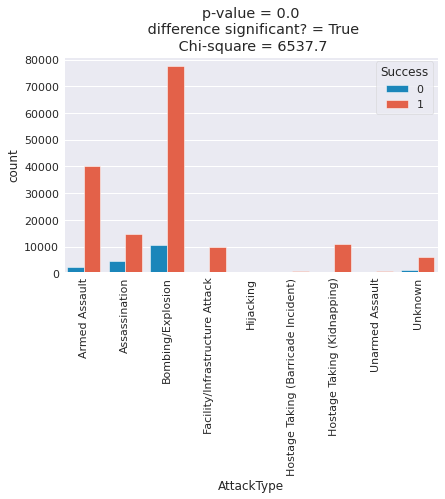

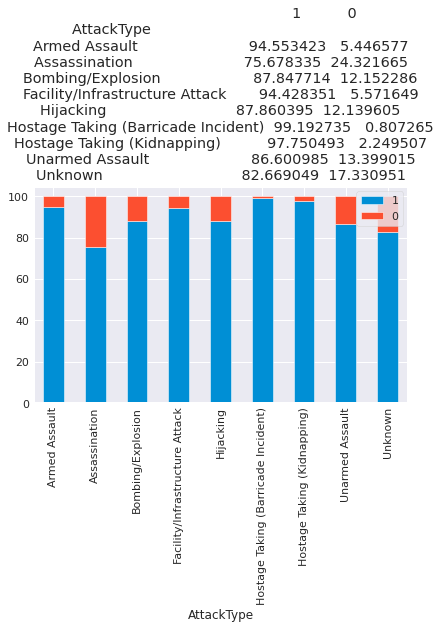

In [ ]:
#Executing the bivariate analysis on AttackType with success rate.
BVA_categorical_plot(df_terr,'Success', 'AttackType')



*   Before we have seen that Hostage Taking incidents were 4th highest used for attacking, but here we can see that It has the highest success rate with 99% of successful attempts among all attacking medium.
*   Assassination has approximately 24% of unsuccessful attempts.



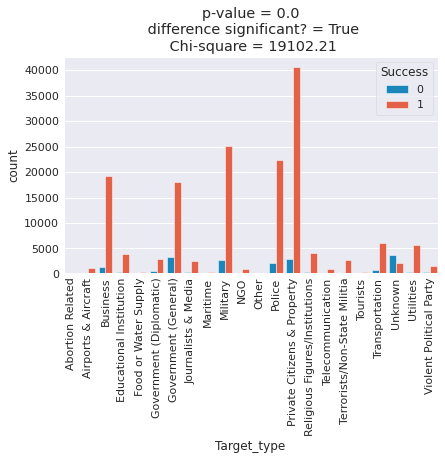

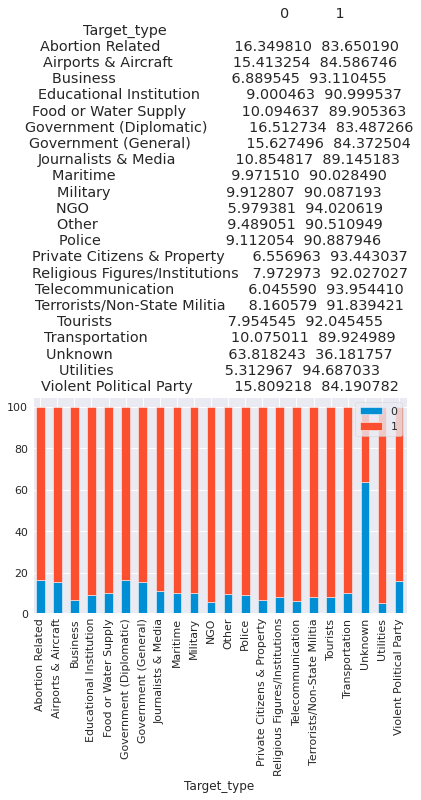

In [ ]:
#Executing the bivariate analysis on Target_type with success rate.
BVA_categorical_plot(df_terr,'Success', 'Target_type')

*  Before we have seen that Private Citizen & Property faced the highest number of attacks and Abortion related faced the least number of attacks.
*   But here, We see the change in figures that the Utilities in the country faces highest terrorist successful attacks with 94.6% of success rate followed by NGO's with 94% of success rate.
*   Among all targeted areas Governments (Diplomats) offices faced highest unsuccessful attacks with 16.5% of success rate.

##Maximum attack depending upon the type of attack:

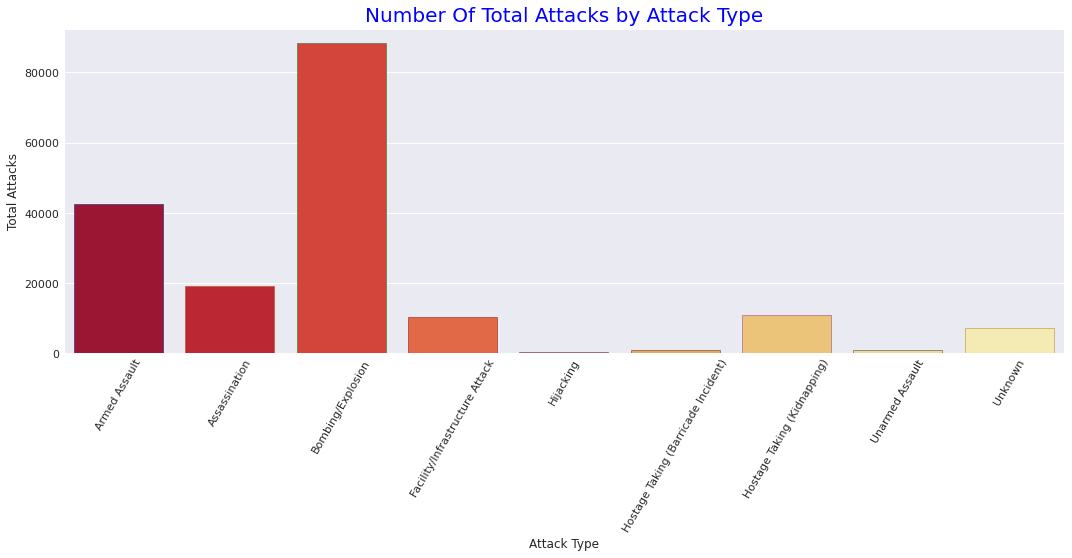

In [ ]:
#Visualizing the comparison between AttackType with total number of attacks.
attack_type = df_terr.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(16,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=60)
plt.title('Number Of Total Attacks by Attack Type', fontsize=20, color = 'blue')
plt.show()



**Bombing/Explosion** followed by  **Armed Assault** are still the top mediums among all that are used for attacks.

In [ ]:
#Comparing the two categorical features in values form to analyze the detailed response.
group_attacks = df_terr.Group.value_counts().to_frame().reset_index()[:20]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


The three highest known number of attacks were done by **Taliban** (South Asian group), **ISIL** (Islamic State of Iraq and Syria) and **Shining Path** (Communist party in Peru).



##Let us examine the total number of assassinations perpetrated by terrorist groups:


In [ ]:
#Comparing the group vs number of killed features in values form to analyze the detailed response.
df_terr.groupby('Group').agg({'Killed':'sum'}).rename(columns={'Killed': 'killed'}).sort_values(by= 'killed',ascending=False).reset_index()

,Group,killed
0,Unknown,112367.0
1,Islamic State of Iraq and the Levant (ISIL),38923.0
2,Taliban,29410.0
3,Boko Haram,20328.0
4,Shining Path (SL),11601.0
...,...,...
3532,New Revolutionary Alternative (NRA),0.0
3533,Council for the Destruction of Order,0.0
3534,Counterrevolutionary Solidarity (SC),0.0
3535,New Partisans Movement,0.0


#**Multivariate Analysis**

##Multivariate Analysis between Categorical and Numerical features:

In [ ]:
#By using multivariate analysis we experiment with combination of numerical as well as categorical features.
coutry_vs_attack_type = (df_terr.groupby(['Region','Country','AttackType']).agg({'Casualties':'sum'}).rename(columns={'Casualties': 'Casuality_rate'}).sort_values(by= 'Casuality_rate',ascending=False).reset_index())
coutry_vs_attack_type

,Region,Country,AttackType,Casuality_rate
0,Middle East & North Africa,Iraq,Bombing/Explosion,174889.0
1,South Asia,Pakistan,Bombing/Explosion,44600.0
2,South Asia,Afghanistan,Bombing/Explosion,42669.0
3,South Asia,India,Bombing/Explosion,26186.0
4,South Asia,Afghanistan,Armed Assault,20338.0
...,...,...,...,...
22135,Eastern Europe,Angola,Facility/Infrastructure Attack,0.0
22136,Eastern Europe,Angola,Bombing/Explosion,0.0
22137,Eastern Europe,Angola,Assassination,0.0
22138,Eastern Europe,Angola,Armed Assault,0.0



*   The maximum casualties occurred in Middle East & North Africa, in Iraq by Bombing/Explosion with 174889 persons.

*   South Asia is the second most affected region by Terrorism activities, whereas the least affected region is Australasia & Oceania.            
*   The least Casuality region is Western and Eastern Europe.





In [ ]:
#Comparing country with attackType occurred.
coutry_vs_attack_type[coutry_vs_attack_type['AttackType']=='Facility/Infrastructure Attack'][:10]

,Region,Country,AttackType,Casuality_rate
157,South Asia,Bangladesh,Facility/Infrastructure Attack,569.0
174,Middle East & North Africa,Iran,Facility/Infrastructure Attack,430.0
175,South Asia,Afghanistan,Facility/Infrastructure Attack,425.0
189,North America,United States,Facility/Infrastructure Attack,363.0
194,Sub-Saharan Africa,Mozambique,Facility/Infrastructure Attack,342.0
200,South Asia,India,Facility/Infrastructure Attack,313.0
220,Middle East & North Africa,West Bank and Gaza Strip,Facility/Infrastructure Attack,248.0
254,Sub-Saharan Africa,Nigeria,Facility/Infrastructure Attack,185.0
261,Sub-Saharan Africa,Democratic Republic of the Congo,Facility/Infrastructure Attack,174.0
263,Southeast Asia,Philippines,Facility/Infrastructure Attack,170.0


##Which city has the highest to lowest attack beneath each country:

In [ ]:
#Comparing the numerical with categorical features in values form to analyze the detailed response.
(df_terr.groupby(['Country','City']).agg({'Casualties':'sum'}).rename(columns={'Casualties': 'Casuality_rate'}).sort_values(by= 'Casuality_rate',ascending=False).reset_index())

,Country,City,Casuality_rate
0,Iraq,Baghdad,76894.0
1,United States,New York City,19618.0
2,Iraq,Mosul,12360.0
3,Pakistan,Karachi,9201.0
4,Somalia,Mogadishu,8603.0
...,...,...,...
7518165,Greece,Jawand district,0.0
7518166,Greece,Jawaleq,0.0
7518167,Greece,Jawalah,0.0
7518168,Greece,Jawaki Banda,0.0


In [ ]:
#To analyzing the number of attacks vs casualties in a particular city.
city_attacks = df_terr.City.value_counts().to_frame().reset_index()
city_attacks.columns = ['City', 'Total Attacks']
city_cas = df_terr.groupby('City').Casualties.sum().to_frame().reset_index()
city_cas.columns = ['City', 'Casualties']
# city_cas.drop('Unknown', axis=0, inplace=True)
city_tot = pd.merge(city_attacks, city_cas, how='left', on='City').sort_values('Total Attacks', ascending=False)[1:21]

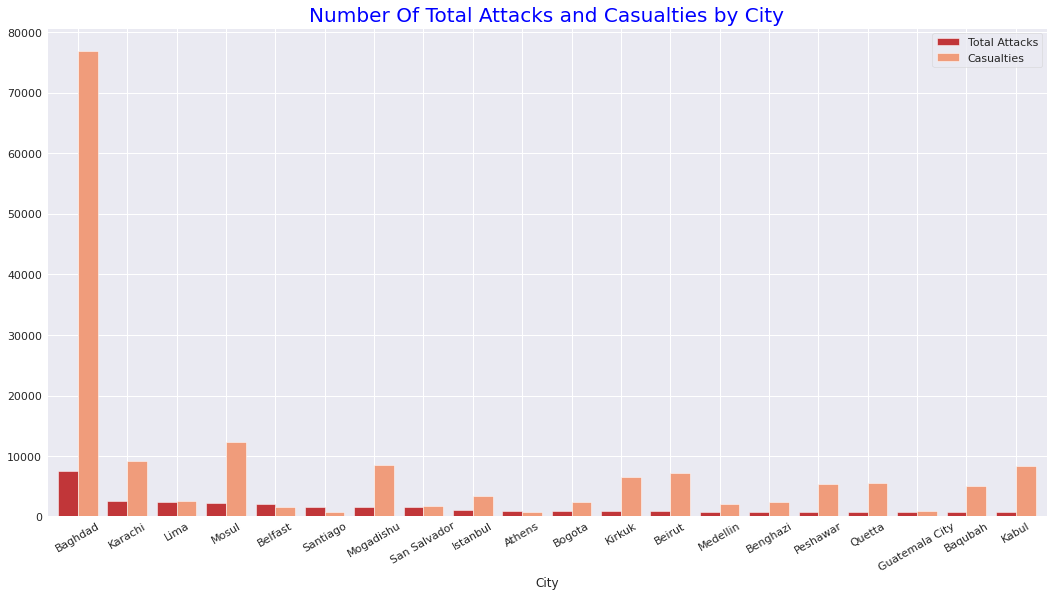

In [ ]:
#Using barplot we get the response with multivariate features.
# fig = plt.figure()
# fig.subplots()
sns.set_palette('RdBu')
city_tot.plot.bar(x='City', width=0.8)
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks and Casualties by City', fontsize=20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

Here we can see the Total number of Attacks side by side of the Total Casualitities of each city. First, **Baghdad**, has about 76 thousand of casualties, 10 times of the Attacks. It shows us that the ratio of casualties to attacks is really high followed by Karachi in Pakistan. Roughly, there have been about 5 casualties per attacks. Next is Lima, the capital of Peru. The ratio is roughly 1:1.

In [ ]:
#Comparing the numerical with categorical features in values form to analyze the detailed response.
coutry_vs_group=(df_terr.groupby(['Year','Country','Group']).agg({'Casualties':'sum'}).rename(columns={'Casualties': 'Casualty_rate'}).sort_values(by= 'Casualty_rate',ascending=False).reset_index())
coutry_vs_group

,Year,Country,Group,Casualty_rate
0,2001,United States,Al-Qaida,19494.0
1,2013,Iraq,Unknown,16400.0
2,2007,Iraq,Unknown,15589.0
3,2014,Iraq,Unknown,15347.0
4,2016,Iraq,Islamic State of Iraq and the Levant (ISIL),14637.0
...,...,...,...,...
34078990,1985,Papua New Guinea,Shonkonjuku Group,0.0
34078991,1985,Papua New Guinea,Shiv Sena,0.0
34078992,1985,Papua New Guinea,Shinwari Tribe,0.0
34078993,1985,Papua New Guinea,Shining Path (SL),0.0


In [ ]:
#Here we specify a particular group with casualty in countries within a particular year.
coutry_vs_group[coutry_vs_group['Group']=='Taliban']

,Year,Country,Group,Casualty_rate
9,2015,Afghanistan,Taliban,9767.0
11,2016,Afghanistan,Taliban,9294.0
12,2017,Afghanistan,Taliban,8369.0
15,2014,Afghanistan,Taliban,7281.0
22,2012,Afghanistan,Taliban,5462.0
...,...,...,...,...
34063780,1985,Pakistan,Taliban,0.0
34064598,1985,Panama,Taliban,0.0
34068552,1985,Norway,Taliban,0.0
34074227,1985,Paraguay,Taliban,0.0


##Determining the terrorist groups activity trend:

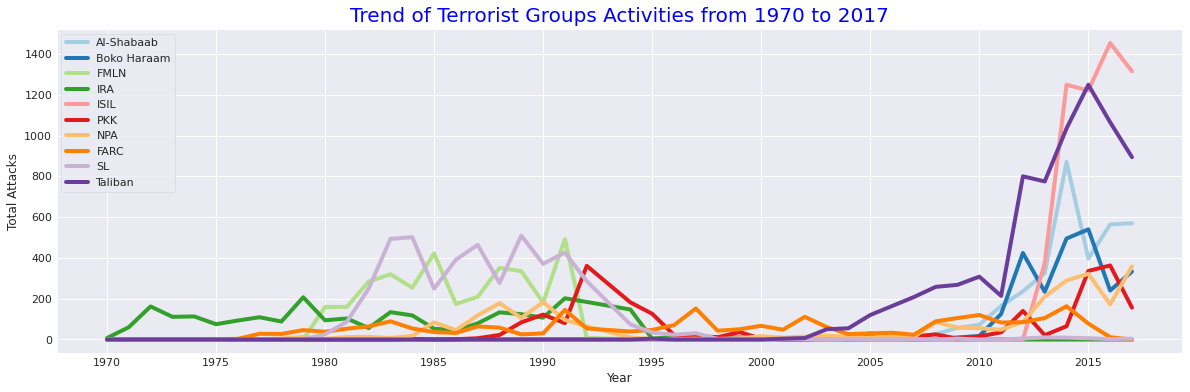

In [ ]:
#Determining the last 5 year decade trend.
groups_10 = df_terr[df_terr.Group.isin(df_terr.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Trend of Terrorist Groups Activities from 1970 to 2017', fontsize=20, color = 'blue')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

This is an interesting plot. It's a trend of the terrorist group activities during these 47 years. There has been a rise and decline in the activity of 10 most attacker groups. For example, Taliban hadn't been an important role player in this field until 2003 and then, it starts its job with a sharp angle and overall becomes the group that has done the most terrorist attacks. Also ISIL, hadn't been established or activated until 2012 and in the next four years after that, had the highest number. In the 90s, PKK (Kurdistan Workers' Party a Turkey group) did the highest number of attacks and apparently becomes deactivated until 2012. Similarly, SL and IRA, were very active in 70s and 80s respectively. Also, we can see the trend that there's kind of cooperation or a suitable context after 2010 to do terrorist actions.

Over the past few decades, we have seen it hovered from 0.01% to 0.02% over the 1990s and early 2000s; increased to **0.08% in 2014**; before falling to 0.05% in 2017. **2014** was therefore a relatively high year for terrorist attacks.










#Conclusion


*  There has been a spike in terrorist activity post-2005.
*  The number of casualties goes up as the attacks go up.

*  As we have seen from the analysis, 50% of bombing and explosions are primarily used weapon for attacking which leads to more fatalities.
*  The security arrangements should be improvised for the Private Citizens & Property as 24% of attacks were seen on them.


*   Middle East, specifically Iraq should be a major concern for the terrorism activities.
*  One can conclude that the Taliban predominated after year-2000. But from 1970 to 1990 a Peru-based terrorist organization called Shining Path (SL) and Irish Republican Army (IRA) was highly dominating among all groups.






#Challenges:



*   Refining the dataset and also many of features doesn’t suit’s my purpose in this analysis.

*   Selecting the dependent and independent features, so it could help us to deep dive using a more efficient method.
*   Combining multiple features to visualize and get the optimum insights from the data.


